## Zero-Shot Learning Experiments

### Topic classification

Using https://huggingface.co/zero-shot/ 

### 1. Replicate the results from app in code

In [1]:
from transformers import pipeline

In [2]:
classifier = pipeline('zero-shot-classification',
                      model='joeddav/xlm-roberta-large-xnli')

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
sequence = "The Avengers - Hammer Top Besetzung - Top Film endlich war es soweit. Meine Superhelden vereint in einem Film. Ich habe mich besonders auf Robert Downey Jr. und Chris Hemsworth gefreut. Robert stellt Iron Man mit einer Coolness dar, die man nicht überbieten kann. Die Rolle ist perfekt auf ihn zugeschnitten. Chris Hemsworth ist einfach eine Augenweide:-). Loki war auch super. Gegen Mark Ruffalo als Hulk hatte ich meine Bedenken, die wurden dann aber im Film widerlegt. Wenn man die einzelnen Filme vorher gesehen hat und auch die Anspielungen auf 'The Avengers' verstanden hat, ist der Film noch interessanter. Die Story war vorhersehbar, aber trotzdem gut. Was mir am besten gefallen hat, ist das jeder Charakter gleich stark vertreten war. Fazit: Unbedingt anschauen!"
hypothesis_template = 'This text is about {}.' 
labels = "películas, acción, superhéroes, libros"
allow_multi_class = True

In [4]:
result = classifier(sequence, labels,
           hypothesis_template=hypothesis_template,
           multi_class=allow_multi_class)

result

{'sequence': "The Avengers - Hammer Top Besetzung - Top Film endlich war es soweit. Meine Superhelden vereint in einem Film. Ich habe mich besonders auf Robert Downey Jr. und Chris Hemsworth gefreut. Robert stellt Iron Man mit einer Coolness dar, die man nicht überbieten kann. Die Rolle ist perfekt auf ihn zugeschnitten. Chris Hemsworth ist einfach eine Augenweide:-). Loki war auch super. Gegen Mark Ruffalo als Hulk hatte ich meine Bedenken, die wurden dann aber im Film widerlegt. Wenn man die einzelnen Filme vorher gesehen hat und auch die Anspielungen auf 'The Avengers' verstanden hat, ist der Film noch interessanter. Die Story war vorhersehbar, aber trotzdem gut. Was mir am besten gefallen hat, ist das jeder Charakter gleich stark vertreten war. Fazit: Unbedingt anschauen!",
 'labels': ['superhéroes', 'películas', 'acción', 'libros'],
 'scores': [0.9459265470504761,
  0.6354550123214722,
  0.593166172504425,
  0.02965512126684189]}

In [5]:
result["labels"][0], result["scores"][0]

('superhéroes', 0.9459265470504761)

### 2. Apply method to all the sentences from our data

In [3]:
HYPOTHESIS_TEMPLATE = 'This text is about {}.' 
LABELS = "Direct payment, Tax deduction, Credit/guarantee, Technical assistance, Supplies, Fines, Unknown"

def classify_sentence(sentence, labels, allow_multi_class=False, multi_class_thresh=0.5, all_probs=False):
    result = classifier(sentence, labels,
           hypothesis_template=HYPOTHESIS_TEMPLATE,
           multi_class=allow_multi_class)
    
    if all_probs:
        return result["labels"], result["scores"]
    
    if allow_multi_class:
        multi_labels = []
        multi_scores = []
        for i, score in enumerate(result["scores"]):
            if score > multi_class_thresh:
                multi_labels.append(result["labels"][i])
                multi_scores.append(score)
         
        return multi_labels, multi_scores
    
    return result["labels"][0], result["scores"][0]

In [19]:
# True label: guarantee
classify_sentence("Disminuir los riesgos para el inversionista implementando mecanismos de aseguramiento.", LABELS, True)

(['credit/guarantee', 'fines'], [0.848248302936554, 0.5838057994842529])

In [5]:
# True label: direct payment
classify_sentence("Los recursos que el Fondo Forestal Mexicano obtenga por el cobro de bienes y servicios ambientales se entregarán directamente a los proveedores de dichos servicios y una parte se destinará a cubrir los costos de esta operación.", LABELS)

('Direct payment', 0.42551904916763306)

In [6]:
# True label: Tax deduction
classify_sentence("Otorgar incentivos fiscales a las plantaciones forestales comerciales, incluyendo incentivos dirigidos a promover la industria ligada a las plantaciones comerciales forestales.", LABELS)

('Tax deduction', 0.4818664789199829)

In [7]:
import pandas as pd
from tqdm import tqdm

In [8]:
df = pd.read_excel("/Users/dafirebanks/Downloads/WRI Policy Tags Complete File phrases extraction all.xlsx",
                    sheet_name=None,
                  engine='openpyxl')

In [9]:
df.keys()

dict_keys(['Mexico ', 'Peru ', 'Chile ', 'Guatemala ', 'El Salvador', 'El Salvador  - local'])

In [13]:
mexico_df = df['Mexico ']
mexico_df.head()

,Document,Original Text,"Relevant Sentences (for Environment, Incentives, Land Type)","Relevant Phrases (for Environment, Incentives, Land Type)",Incentive Instrument,Land Use Type,Category,Unique Policy #,Key words
0,2019 ACUERDO por el que se emiten los Lineamie...,Generar empleo y garantizara la población camp...,Generar empleo y garantizara la población camp...,garantizara la población campesina el bienesta...,"Direct payment (PES), Credit, Technical assist...","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),"insumo, crédito, capacitación, asistencia técnica"
1,2019 ACUERDO por el que se emiten los Lineamie...,\nEl Programa incentivará a los sujetos agrari...,\nEl Programa incentivará a los sujetos agrari...,incentivará a los sujetos agrarios a establece...,"Direct payment (PES), Credit, Technical assist...","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),incentivar
2,2019 ACUERDO por el que se emiten los Lineamie...,Los sujetos agrarios beneficiados por el progr...,Los sujetos agrarios beneficiados por el progr...,Los sujetos agrarios beneficiados por el progr...,"Supplies, Technical assistance","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),"apoyo económico, apoyos en especie, insumos, h..."
3,2019 ACUERDO por el que se emiten los Lineamie...,"El sujeto de derecho, recibirá un apoyo económ...","El sujeto de derecho, recibirá un apoyo económ...","recibirá un apoyo económico de $5,000.00 (Cin...",Direct payment (PES),"Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),pesos
4,2019 ACUERDO por el que se emiten los Lineamie...,"El sujeto de derecho, recibirá en especie las ...","El sujeto de derecho, recibirá en especie las ...",recibirá en especie las plantas necesarias par...,Supplies,"Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),recibir


In [14]:
mexico_df.columns

Index(['Document', 'Original Text',
       'Relevant Sentences (for Environment, Incentives, Land Type) ',
       'Relevant Phrases (for Environment, Incentives, Land Type) ',
       'Incentive Instrument', 'Land Use Type', 'Category', 'Unique Policy #',
       'Key words'],
      dtype='object')

In [15]:
sents = mexico_df['Relevant Sentences (for Environment, Incentives, Land Type) ']
sents

0      Generar empleo y garantizara la población camp...
1      \nEl Programa incentivará a los sujetos agrari...
2      Los sujetos agrarios beneficiados por el progr...
3      El sujeto de derecho, recibirá un apoyo económ...
4      El sujeto de derecho, recibirá en especie las ...
                             ...                        
98     Quienes aprovechen tierras de pastoreo y opten...
99     De los apoyos e incentivos;\n La Secretaría fo...
100    Generación y transferencia de tecnologías, for...
101    Los municipios y las delegaciones de las depen...
102    El Ejecutivo Federal, por conducto de las Secr...
Name: Relevant Sentences (for Environment, Incentives, Land Type) , Length: 103, dtype: object

In [16]:
sents = sents.apply(lambda x : x.replace("\n", "").strip())

In [17]:
sents

0      Generar empleo y garantizara la población camp...
1      El Programa incentivará a los sujetos agrarios...
2      Los sujetos agrarios beneficiados por el progr...
3      El sujeto de derecho, recibirá un apoyo económ...
4      El sujeto de derecho, recibirá en especie las ...
                             ...                        
98     Quienes aprovechen tierras de pastoreo y opten...
99     De los apoyos e incentivos; La Secretaría form...
100    Generación y transferencia de tecnologías, for...
101    Los municipios y las delegaciones de las depen...
102    El Ejecutivo Federal, por conducto de las Secr...
Name: Relevant Sentences (for Environment, Incentives, Land Type) , Length: 103, dtype: object

### 3. Binary classification

In [18]:
labels = mexico_df['Incentive Instrument']

In [19]:
binary_labels = labels.apply(lambda x: "incentive" if x != "Unknown" else "not incentive")

In [20]:
binary_labels.value_counts()

incentive        60
not incentive    43
Name: Incentive Instrument, dtype: int64

In [21]:
mexico_df['binary_label'] = binary_labels

In [22]:
mexico_df.head()

,Document,Original Text,"Relevant Sentences (for Environment, Incentives, Land Type)","Relevant Phrases (for Environment, Incentives, Land Type)",Incentive Instrument,Land Use Type,Category,Unique Policy #,Key words,binary_label
0,2019 ACUERDO por el que se emiten los Lineamie...,Generar empleo y garantizara la población camp...,Generar empleo y garantizara la población camp...,garantizara la población campesina el bienesta...,"Direct payment (PES), Credit, Technical assist...","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),"insumo, crédito, capacitación, asistencia técnica",incentive
1,2019 ACUERDO por el que se emiten los Lineamie...,\nEl Programa incentivará a los sujetos agrari...,\nEl Programa incentivará a los sujetos agrari...,incentivará a los sujetos agrarios a establece...,"Direct payment (PES), Credit, Technical assist...","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),incentivar,incentive
2,2019 ACUERDO por el que se emiten los Lineamie...,Los sujetos agrarios beneficiados por el progr...,Los sujetos agrarios beneficiados por el progr...,Los sujetos agrarios beneficiados por el progr...,"Supplies, Technical assistance","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),"apoyo económico, apoyos en especie, insumos, h...",incentive
3,2019 ACUERDO por el que se emiten los Lineamie...,"El sujeto de derecho, recibirá un apoyo económ...","El sujeto de derecho, recibirá un apoyo económ...","recibirá un apoyo económico de $5,000.00 (Cin...",Direct payment (PES),"Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),pesos,incentive
4,2019 ACUERDO por el que se emiten los Lineamie...,"El sujeto de derecho, recibirá en especie las ...","El sujeto de derecho, recibirá en especie las ...",recibirá en especie las plantas necesarias par...,Supplies,"Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),recibir,incentive


In [23]:
LABELS = "Incentive, Not Incentive"
model_preds = []
scores = []
for sentence in tqdm(sents):
    model_pred, score = classify_sentence(sentence, LABELS)
    model_preds.append(model_pred)
    scores.append(score)

100%|██████████| 103/103 [03:54<00:00,  2.27s/it]


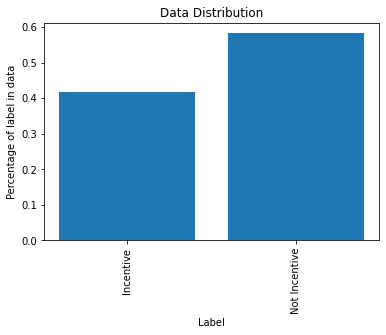

Label counts:
{'Incentive': 0.4174757281553398, 'Not Incentive': 0.5825242718446602}


In [28]:
bin_labels = [1 if label == "incentive" else 0 for label in binary_labels]
bin_preds = [1 if label == "Incentive" else 0 for label in model_preds]
label_names = LABELS.split(", ")
plot_data_distribution(bin_labels, label_names, normalize=True)

In [25]:
import sys
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../../")

from tasks.evaluate_model.src.model_evaluator import *
from tasks.data_loader.src.utils import *

In [44]:
evaluator = ModelEvaluator(label_names)

In [45]:
evaluator.update(bin_labels, bin_preds)
print("Recall per class:", evaluator.recall)
print("Average weighted precision:", evaluator.avg_precision[1])

Recall per class: [0.04651163 0.86666667]
Average weighted precision: 0.4092076417162543


Stored confusion matrix: ../output/binary_class_test_cm.png


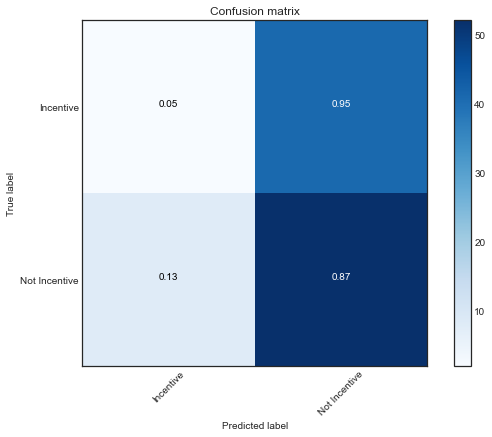

Stored results: ../output/binary_class_test_results.csv


,Precision,Recall (Sensitivity),True negative rate (Specificity),F1-score
Incentive,0.2,0.05,0.87,0.08
Not Incentive,0.56,0.87,0.05,0.68
Macro avg,0.38,0.46,0.46,0.38
Weighted avg,0.41,0.52,0.39,0.43
Accuracy,-----,-----,-----,0.5242718446601942
-----,-----,-----,-----,-----


In [47]:
evaluator.evaluate(bin_labels, bin_preds, 
                   plot_cm=True, plot_prc=False, plot_prc_multi=False, normalize=True, 
                   store=True, exp_name="binary_class_test")

### 4. Multi class classification

In [67]:
LABELS = "Direct payment, Tax deduction, Credit/guarantee, Technical assistance, Supplies, Fines, Unknown"
model_preds = []
scores = []
for sentence in tqdm(sents):
    model_pred, score = classify_sentence(sentence, LABELS)
    model_preds.append(model_pred)
    scores.append(score)

100%|██████████| 103/103 [09:19<00:00,  5.43s/it]


In [63]:
model_preds[:10], mexico_df["Incentive Instrument"].loc[:10]

(['Fines',
  'Credit/guarantee',
  'Technical assistance',
  'Credit/guarantee',
  'Fines',
  'Supplies',
  'Technical assistance',
  'Technical assistance',
  'Supplies',
  'Fines'],
 0     Direct payment (PES), Credit, Technical assist...
 1     Direct payment (PES), Credit, Technical assist...
 2                        Supplies, Technical assistance
 3                                 Direct payment (PES) 
 4                                            Supplies  
 5                                            Supplies  
 6                                  Technical assistance
 7                                  Technical assistance
 8                                  Direct payment (PES)
 9     Direct payment (PES), Credit, Technical assist...
 10                                 Direct payment (PES)
 Name: Incentive Instrument, dtype: object)

In [ ]:
mexico_df

In [56]:
evaluator = ModelEvaluator(LABELS.split(", "))

In [ ]:
evaluator.evaluate(bin_labels, bin_preds, 
                   plot_cm=True, plot_prc=False, plot_prc_multi=False, normalize=True, 
                   store=True, exp_name="binary_class_test")

# TODO:
- Adapt model evaluator code for binary classification setting and multi label classification
- Write script for evaluating in all countries, not just mexico

In [16]:
# Binary script for all countries
LABELS = "incentive, not an incentive"
bin_all_preds = {}
bin_all_scores = {}

for country, dataframe in df.items():
    print("Analyzing", country, "...")
    col_name = 'Relevant Sentences (for Environment, Incentives, Land Type) '
    sents = dataframe[col_name].dropna()
    sents = sents.apply(lambda x : x.replace("\n", "").strip())
    
    labels = dataframe['Incentive Instrument']
    binary_labels = labels.apply(lambda x: "incentive" if x != "Unknown" else "not an incentive")
    dataframe['binary_label'] = binary_labels
    
    model_preds = []
    scores = []
    for sentence in tqdm(sents):
        model_pred, score = classify_sentence(sentence, LABELS)
        model_preds.append(model_pred)
        scores.append(score)
    
    bin_all_preds[country] = model_preds
    bin_all_scores[country] = scores
    

  0%|          | 0/103 [00:00<?, ?it/s]

Analyzing Mexico  ...


  0%|          | 0/69 [00:00<?, ?it/s]

Analyzing Peru  ...


  0%|          | 0/60 [00:00<?, ?it/s]

Analyzing Chile  ...


  0%|          | 0/68 [00:00<?, ?it/s]

Analyzing Guatemala  ...


  0%|          | 0/55 [00:00<?, ?it/s]

Analyzing El Salvador ...


  0%|          | 0/30 [00:00<?, ?it/s]

Analyzing El Salvador  - local ...


100%|██████████| 30/30 [00:48<00:00,  1.62s/it]


In [20]:
# Multi-class script for all countries
LABELS = "direct payment, tax deduction, credit/guarantee, technical assistance, supplies, fines, unknown"

multi_all_preds = {}
multi_all_scores = {}

for country, dataframe in df.items():
    # Check whether this column exists
    col_name = 'Relevant Sentences (for Environment, Incentives, Land Type) '
        
    sents = dataframe[col_name].dropna()
    sents = sents.apply(lambda x : x.replace("\n", "").strip())
    
    model_preds = []
    scores = []
    for sentence in tqdm(sents):
        model_pred, score = classify_sentence(sentence, LABELS)
        model_preds.append(model_pred)
        scores.append(score)
    
    multi_all_preds[country] = model_preds
    multi_all_scores[country] = scores
    

 34%|███▍      | 35/103 [05:04<09:52,  8.71s/it]


KeyboardInterrupt: 